In [1]:
import pandas as pd
import numpy as np
import PIL.Image as pilimg
import matplotlib.pyplot as plt
import statsmodels.api as sm

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV



## 데이터 설명
#### id : data id

#### digit : hidden num

#### letter : alpabet which hide num

#### 0~783 : 28*28 pixel val

In [34]:
#데이터 불러오기 
train_df = pd.read_csv("train.csv")

In [35]:
#데이터 봐보기
train_df

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


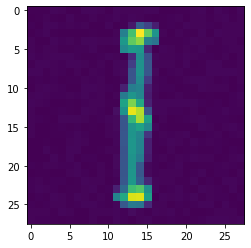

In [36]:
# 이미지 봐보기
## ㅣ 뒤에 숫자 5가 숨어있다.

#ARRAY 화
array_0 =np.array(train_df.loc[0])[3:]
#자료형 변경
array_0= array_0.astype(int)
#28*28 배열 변경
array_0 =array_0.reshape(28,28)
pix = array_0
plt.imshow(pix)

## 분석 시작

In [38]:
#목표 문자 뒤에 있는 숫자를 맞춰보자!
#첫번째 가정
#문자 마다 공통적으로 존재하는 데이터가 존재할것이다
##공통적으로 존재하는 데이터를 제거하고 숫자를 맞춰보자

#알고리즘 구조
## 1.문자 종류에 따라 문자를 묶어준다.
## 2.문자 마다 공통적으로 존재하는 feature을 찾아준다.
## 3.공통적으로 존재하는 feature를 제거한 후 남은 데이터 기반으로 숫자를 예측하는 모델을 학습 시킨다.

In [117]:
#알파벳 별로 몇개 있는지 체크
train_df.groupby(train_df["letter"]).size()

letter
A    72
B    71
C    74
D    76
E    66
F    80
G    87
H    89
I    64
J    67
K    90
L    89
M    86
N    77
O    90
P    66
Q    82
R    81
S    76
T    82
U    85
V    73
W    69
X    79
Y    86
Z    91
dtype: int64

In [178]:
# 자동으로 어떻게 넣을까 생각해보기
# letter_Data =dict(list(train_df.groupby("letter")))
# data= list(letter_Data.keys())
# np.array(data)
# for i in data:
#     i = pd.DataFrame(letter_Data[i])

In [185]:
# A 부터 체크해보기
A =letter_Data["A"]

In [186]:
# id,digit- 숫자는 일단 제거
A = A.drop(['id','digit'],axis=1)

In [190]:
y =A["letter"]
X =A.drop("letter",axis=1)

In [191]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2 ,random_state =3)
print(X_train.shape,X_test.shape)

(57, 784) (15, 784)


In [193]:
rfc = RandomForestClassifier(n_estimators=100, criterion = "entropy")

rfc.fit(X_train, y_train)
prediction = rfc.predict(X_test)
rfc.score(X_test, y_test)

1.0

In [196]:
from sklearn.metrics import classification_report

print(classification_report((y_test), prediction))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

